In [1]:
import pickle
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

## Introduction

- This notebook contains steps to analyse the harmonic phonon properties of the hybrid halide perovskite MAPI with a negatively charged iodine interstitial defect
- `IPR_dictionary.p` contains various properties (including inverse participation ratio) of each gamma-point harmonic phonon mode in a 222 supercell (96-atom) of MAPI with a negative iodine interstitial.
- The defect structure is included in this folder as `POSCAR.vasp`

### Associated literature

Further details (including structural relaxation and phonon calculation details) can be found in:
   - L. D. Whalley et al., 2020. *[Giant Huang-Rhys factor for electron capture at the iodine interstitial in MAPI]()*
   - L.D. Whalley, 2019. PhD thesis, *[Defects and Distortions in Hybrid Halide Perovskites](https://doi.org/10.25560/79304)* (Chapter 6)

### Inverse Participation Ratio

To identify which phonon modes are associated with the iodine interstitial defect we use the Inverse Participation Ratio (IPR) to quantify localisation.

The IPR is calculated from the harmonic phonon eigenvectors $e_i$ of the system and is given by
\begin{equation}
\mathrm{IPR} = \frac{\sum_{i=1}^N\left(|e_i|\right)^2}{\left(\sum_{i=1}^N|e_i|\right)^2},
\end{equation}
where N is the number of phonon modes. This provides a measure of how many atoms the phonon is distributed over. For example, for a chain of $N=4$ atoms, a fully delocalised acoustic mode will have an $\textrm{IPR}=\frac{1}{N}=0.25$. At the other extreme, a fully localised phonon mode whose polarisation displaces only one atom will have an $\textrm{IPR}=1$.

The Inverse Participation Ratio (IPR) can be calculated using the [juliaphonons package](https://github.com/jarvist/Julia-Phonons). The harmonic phonon eigenfunctions and frequencies can be calculated using [phonopy](https://phonopy.github.io/phonopy/) to pre- and post-process forces calculated using e.g. Density Function Theory, Molecular Dynamics.

## IPR Analysis

Note that I am analysing phonons at the gamma point only.

### 1. Perfect phonon modes
First lets look at the phonon modes of the perfect crystal without a defect.


In [55]:
phonon_properties[19]['IPR-distance']

5.707384901965092

Text(0.5, 0, 'IPR')

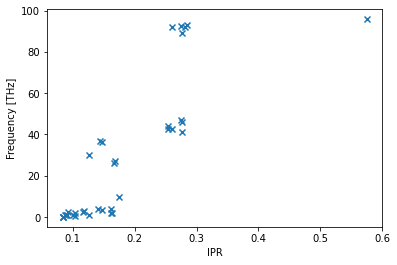

In [50]:
# load phonon properties
phonon_properties = pickle.load(open("./IPR_dictionary_perfect.p","rb"))
# 96-atom supercell with an additional iodine interstitial defect
num_atoms = 12
num_modes = num_atoms*3

# list IPR and frequency data across all modes
frequency = []
IPR = []
for mode in phonon_properties:
    frequency.append(phonon_properties[mode]['freq'])
    IPR.append(1/phonon_properties[mode]['IPR-distance'])

# plot
plt.scatter(IPR,frequency,marker="x")
plt.ylabel("Frequency [THz]")
plt.xlabel("IPR")

This is a 12 atom cell; a completely delocalised mode has an IPR of 1/12=0.08, which is the case for the acoustic modes at gamma point, as would be expected. The most localised mode has an IPR of 0.58. This mode is one of the higher energy modes associated with vibrations of the organic cation. The vibrations of the inorganic cage (0-10THz range) are more delocalised with a maximum IPR of 0.18. To compare these numbers with the 97 defective sytem we need to scale by system size, and multiply by $\frac{12}{97}$.

### 2. Identifying localised modes

Now lets look at the phonon modes in the defective system.

In [43]:
phonon_properties[1]['IPR-distance']

96.99662368714507

Text(0.5, 0, 'IPR')

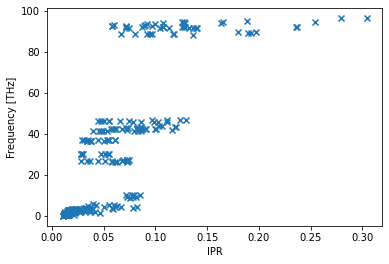

In [62]:
# load phonon properties
phonon_properties = pickle.load(open("./IPR_dictionary_interstitial.p","rb"))
# 96-atom supercell with an additional iodine interstitial defect
num_atoms = 97
num_modes = num_atoms*3

# list IPR and frequency data across all modes
frequency = []
IPR = []
for mode in phonon_properties:
    frequency.append(phonon_properties[mode]['freq'])
    IPR.append(1/phonon_properties[mode]['IPR-distance'])

# plot
plt.scatter(IPR,frequency,marker="x")
plt.ylabel("Frequency [THz]")
plt.xlabel("IPR")

There are a number of localised phonon modes. We can filter for the more localised modes. We define a localised (or resonant) mode as a mode with IPR>0.03, as the maximum IPR for the inorganic modes in the perfect material was 0.0223.

In [75]:
print ("frequency      ", "IPR")
for i in range(1,num_modes):
    if (1/phonon_properties[i]['IPR-distance'])>0.03:
        print(i, phonon_properties[i]['freq'],"  ",(1/phonon_properties[i]['IPR-distance']))

frequency       IPR
64 1.5902196857    0.04668542116971956
66 1.7106084414    0.03681083231706605
75 1.9577188429    0.04131807997219083
92 2.4166029138    0.031447041477347636
98 2.5894861988    0.03670796085142505
105 2.7847191527    0.031507061691639124
107 2.8104776416    0.03730104283201679
115 3.0731670659    0.03716460623691782
116 3.0938448175    0.03646227739931094
118 3.1639162138    0.03528774990373416
121 3.2439361402    0.03203618151576249
123 3.2945608541    0.03985309511411406
126 3.3565617089    0.032813764858816055
130 3.5447143248    0.05898332781127169
132 3.7160298999    0.05797399971701435
133 3.7366079524    0.03147981384975289
134 3.8017893412    0.032774686478134134
135 3.9834887771    0.03296427302307534
136 4.0432149522    0.07870258760084414
137 4.1521589486    0.05055597663908097
138 4.1806764656    0.06068219852264479
139 4.2517677171    0.03808220989568805
140 4.5317593008    0.08250437227903427
141 4.5896585047    0.06719807089631175
142 4.6693388818    0

In general, the more localised modes are higher in energy. These modes are likely to be associated with the movement of the lighter organic atoms. The localised mode with the lowest frequency (and energy) is at 1.59THz. 

### 2. Properties of the localised mode at 1.59THz

This frequency is equal to that of the harmonic potential energy surface (PES) calculated for the negatively charged iodine interstitial (see the literature listed above for more details). This makes sense; the harmonic PES is valid for small displacements around equilibrium, which is the space we are sampling in the harmonic phonon calculation. The agreement between the harmonic phonon calculation and the harmonic PES indicates that the phonon mode at 1.59THz has strong accepting character - it will uptake the excess electronic energy after carrier capture, leading to a displacement of the iodine ions and the surrounding lattice.

An animation of the phonon mode at 1.59THz, generated using the [ascii-phonons](https://github.com/ajjackson/ascii-phonons) package, is available at https://bit.ly/MAPI_phonon.

To verify that this mode is localised around the iodine interstitial (atom index 95) and the lattice iodine it forms a dimer with (atom index 96), a filter can be used to locate those where atom numbers 95 and 96 make a contribution to the phonon energy (where `efrac`>0.03).

In [70]:
print ("frequency      ", "IPR                ","efrac")
for i,j in itertools.product(range(1,num_modes),range(1,num_atoms)):
    if phonon_properties[i][j]['efrac']>0.03 and (j==95 or j==96) and (1/phonon_properties[i]['IPR-distance'])>0.03:
        print (i, phonon_properties[i]['freq'],"  ",(1/phonon_properties[i]['IPR-distance']), " ",phonon_properties[i][j]['efrac']) 

frequency       IPR                 efrac
64 1.5902196857    0.04668542116971956   0.053566709865937284
64 1.5902196857    0.04668542116971956   0.05346389356289189
66 1.7106084414    0.03681083231706605   0.05162546812315868
66 1.7106084414    0.03681083231706605   0.04907367819990428
142 4.6693388818    0.06271257423915087   0.03926431983521863
142 4.6693388818    0.06271257423915087   0.03958798369850175
143 4.8380261881    0.034796805593389504   0.03185182743905141
143 4.8380261881    0.034796805593389504   0.03145140046181075
146 5.5680202666    0.055639573147069986   0.03967906561694908
146 5.5680202666    0.055639573147069986   0.039322696011781226
147 5.7117212604    0.039619623233785706   0.03223705296578235
147 5.7117212604    0.039619623233785706   0.03247747273429075


Ok, so it seems that 11% (5.4%+5.3%) of 1.59THz mode energy can be attributed to the displacement of the two bonding iodines; a significant amount of energy (89%) is distributed amongst the other atoms. This might be expected as the MAPI lattice is soft, and we can see from the equilibrium geometry of the two charge states that there is a large distortion of the surrounding lattice after charge capture.

The 1.59THz mode is at index 64. We can find which atoms contribute the most energy (more than 3% of the total phonon energy) to this phonon mode and then, using [vesta](https://jp-minerals.org/vesta/en/), see if it is localised around the iodine dimer as we would expect.

In [23]:
efrac=0
mode_index=64
for i in range(1, num_atoms):
    if phonon_properties[mode_index][i]['efrac']>0.03:
        print(i,phonon_properties[mode_index][i]['efrac'])
        efrac+=phonon_properties[mode_index][i]['efrac']
print(efrac)

2 0.06440239147774258
4 0.06168246449883173
26 0.03264137712248505
28 0.031979777950358314
34 0.03338512132720793
36 0.031326106363531926
72 0.062681916758608
82 0.043887046008908755
84 0.04350373149048876
95 0.053566709865937284
96 0.05346389356289189
0.5125205364269922


The atoms that each contribute more than 3% of the total phonon energy are highlighted below. Taken together, they account for more than half of the phonon energy.

![](./localised_mode.png)

 The phonon mode is localised around the bonding iodine, two of the four nearest neighbour iodines and one out of two nearest neighbour lead. The atoms lie in the ab-plane.

### 3. Properties of other phonon modes associated with the bonding iodine

Lets find the other modes which have a large energy contribution from the bonding iodine.

In [72]:
print("atom 95")
print ("frequency      ", "IPR                ","efrac")
for i in range(1,num_modes):
    if phonon_properties[i][95]['efrac'] > 0.03:
        print(phonon_properties[i]['freq'],"  ",(1/phonon_properties[i]['IPR-distance']), " ",phonon_properties[i][95]['efrac'])
print("--")
print("atom 96")
print ("frequency      ", "IPR                ","efrac")
for i in range(1,num_modes):
    if phonon_properties[i][96]['efrac'] > 0.03:
        print(phonon_properties[i]['freq'],"  ",(1/phonon_properties[i]['IPR-distance']), " ",phonon_properties[i][96]['efrac'])


atom 95
frequency       IPR                 efrac
0.4853395636    0.01522017719480159   0.03675300577056754
0.7576482515    0.01491503190818238   0.047958440009165625
0.7602759388    0.015463747668050996   0.03183381908920497
0.9369803302    0.013062354596501022   0.03009136937590943
1.0300737444    0.015155329761863588   0.04581924898147083
1.075632191    0.013256983833393656   0.03341512294703494
1.2445419727    0.013129539839760616   0.05407767127403516
1.4370538726    0.02260348822218216   0.0328035318183344
1.4392976571    0.01528150313927033   0.039567946124657895
1.5902196857    0.04668542116971956   0.053566709865937284
1.7106084414    0.03681083231706605   0.05162546812315868
1.7917596692    0.027337796145331196   0.04692933234352594
2.1002269022    0.012765173741780053   0.053834439129200565
2.1211270664    0.01581436119487089   0.0456179311308295
2.1340672112    0.015269400263817304   0.04837620850503517
2.164762451    0.0279241784062521   0.03091884947149302
2.2655739058   

An 11%% contribution from the bonding iodine is an upper limit for this system. There isn't another localised mode with a contribution of more than 10% from the bonding iodine.